# Process
1. import libraries
2. see the over all data(null, type, size)
3. remove unnecessary columns
4. see the percentage of weather conditions over all years
5. see the summary and precipitation type percentage over all the years
6. ratio of 'Snow' days to 'Rain' days
7. the all time maxiumum and minimum records
8. split the date into year, month, day
9.  annual temperature range

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1=pd.read_csv('weatherHistory.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
print(df1.shape)

(96453, 12)


In [5]:
df1.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
del_columns = ['Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']
df = df1.drop(columns = del_columns, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.2+ MB


In [7]:
averageT = df['Temperature (C)'].mean()
average_AT = df['Apparent Temperature (C)'].mean()
average_ws = df['Wind Speed (km/h)'].mean()
average_H = df['Humidity'].mean()

print(f"Average Temprature of the air: {averageT}")
print(f"How the temprature feels in average: {average_AT}")
print(f"Average Wind Speed: {average_ws}")
print(f"Average Humidity: {average_H}")

Average Temprature of the air: 11.93267843751188
How the temprature feels in average: 10.855028874166694
Average Wind Speed: 10.810640140793963
Average Humidity: 0.7348989663359355


In [8]:
weather=df['Summary'].value_counts()
dfweather=pd.DataFrame(weather)
dfweather = dfweather.reset_index()
dfweather.columns = ['Weather', 'Frequency']
dfweather

,Weather,Frequency
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


<Axes: ylabel='Frequency'>

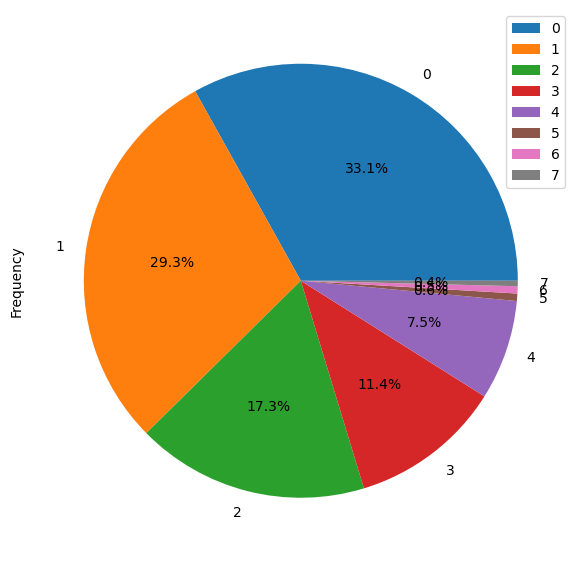

In [9]:
keep=dfweather[dfweather['Frequency']>100]
keep.plot.pie(y='Frequency',autopct='%1.1f%%', figsize=(7,9))

In [10]:
Type=df['Precip Type'].value_counts()
dftype=pd.DataFrame(Type)
dftype = dftype.reset_index()
dftype.columns = ['Precipipitation_Type', 'Frequency']
dftype

,Precipipitation_Type,Frequency
0,rain,85224
1,snow,10712


array([<Axes: ylabel='Frequency'>], dtype=object)

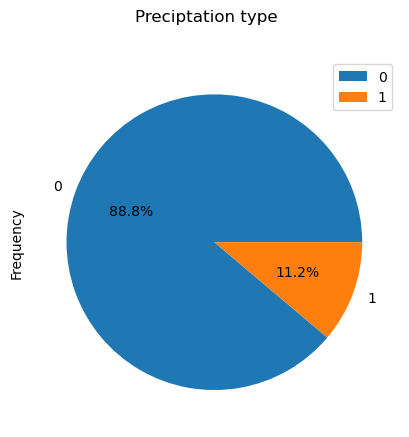

In [11]:
dftype.plot.pie(y='Frequency' , title= 'Preciptation type', autopct='%1.1f%%' , subplots=True)

In [12]:
df2 = df['Formatted Date'].str.split(' ', expand=True)
df2

,0,1,2
0,2006-04-01,00:00:00.000,+0200
1,2006-04-01,01:00:00.000,+0200
2,2006-04-01,02:00:00.000,+0200
3,2006-04-01,03:00:00.000,+0200
4,2006-04-01,04:00:00.000,+0200
...,...,...,...
96448,2016-09-09,19:00:00.000,+0200
96449,2016-09-09,20:00:00.000,+0200
96450,2016-09-09,21:00:00.000,+0200
96451,2016-09-09,22:00:00.000,+0200


In [13]:
df['date'] = df2[0]
df['Time'] = df2[1]
df['globalTime'] = df2[2]

In [14]:
columns = ['Time', 'globalTime', 'Formatted Date']
df = df.drop(columns = columns, axis = 1)


df3 = df['date'].str.split('-', expand = True)
df['Year'] = df3[0]
df['Month'] = df3[1]
df['Day'] = df3[2]
df = df.drop('date', axis = 1)
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Year,Month,Day
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,2006,04,01
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,2006,04,01
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,2006,04,01
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,2006,04,01
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,2006,04,01
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,2016,09,09
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,2016,09,09
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,2016,09,09
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,2016,09,09


In [15]:
yearlyTemp = df.groupby("Year")['Temperature (C)'].agg([('Maximum Temprature', 'max'), ('Minimum Temprature', 'min')])
yearlyTemp

,Maximum Temprature,Minimum Temprature
Year,,
2006,34.005556,-14.088889
2007,39.905556,-10.155556
2008,37.755556,-11.127778
2009,36.111111,-16.666667
2010,34.927778,-15.483333
2011,37.800000,-11.700000
2012,38.861111,-21.822222
2013,37.872222,-8.983333
2014,33.911111,-13.255556


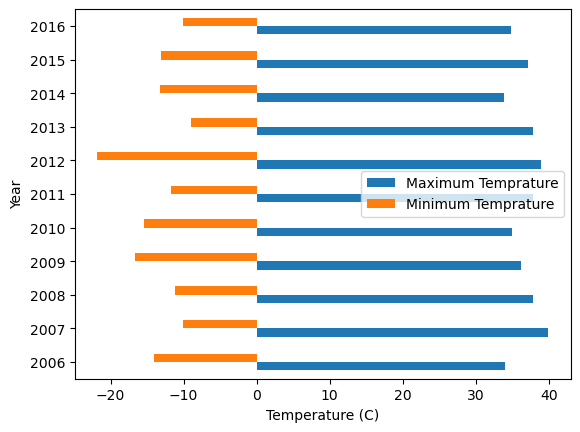

In [35]:
yearlyTemp.plot.barh(xlabel = 'Temperature (C)', ylabel = 'Year')
plt.show()

In [51]:
minTemp = df["Temperature (C)"].min()
maxTemp = df["Temperature (C)"].max()
print(f"Maximum Temprature: {maxTemp: .3f}")
print(f"Minimum Temprature: {minTemp: .3f}")

Maximum Temprature:  39.906
Minimum Temprature: -21.822


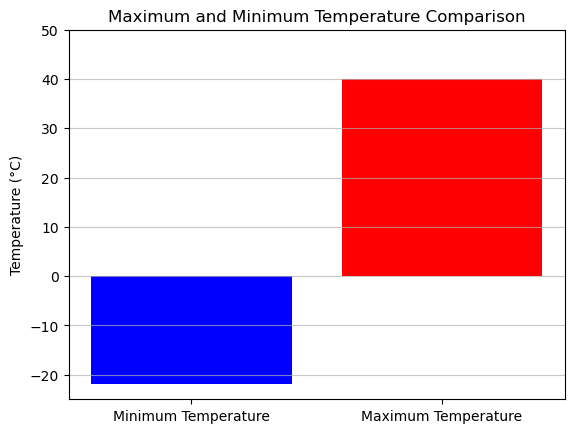

In [52]:
plot_data = pd.DataFrame({
    'Category': ['Minimum Temperature', 'Maximum Temperature'],
    'Value': [minTemp, maxTemp]
})
plt.figure()
bars = plt.bar(
    plot_data['Category'],
    plot_data['Value'],
    color=['Blue', 'red'])
plt.title('Maximum and Minimum Temperature Comparison')
plt.ylabel('Temperature (°C)')
plt.ylim(-25, 50) 
plt.grid(axis='y', alpha=0.7)
plt.savefig('bar_graph_min_max_temp.png')
plt.show()